# Fully Connected Layers vs Convolutional Layers

By playing around with the interactive widgets, you've seen how convolutional layers transform input matrices and you've tested different settings involving different padding, kernel sizes, striding, number of filters and number of input channels. In this notebook we will look at how a convolutional layer differs from dense layers and how and in which aspects they share the same properties. We will find that convolutional layers can be thought of as generalizations of dense layers in that they allow for spatial weight sharing across the input.

First, let's see that a Conv2D layer can be reduced to a fully connected (dense) layer if the kernel size matches the input size, the strides are (1,1) and no padding is applied (i.e. padding="valid"). Such a convolutional layer can produce the same output as a dense layer if we use the same weights. 

In [2]:
import tensorflow as tf

In [38]:
with tf.device('/device:cpu:0'):
    
    
    input_shape = (16,16)
    n_outputs = 128
    
    #create input of shape (1,16,16,1)
    input_img= tf.random.uniform(shape=(1, input_shape[0], input_shape[1],1))
    
    # instantiate Conv2D layer with 128 filters with kernel size (16,16), without extra padding
    convlayer = tf.keras.layers.Conv2D(filters=n_outputs, 
                                       kernel_size=input_shape, 
                                       strides=(1, 1), 
                                       padding="valid")
    
    # instantiate dense layer with 128 outputs
    denselayer= tf.keras.layers.Dense(n_outputs)
    
    # flatten input to process it with dense layer
    flatted_input = tf.keras.layers.Flatten()(input_img)
    denseoutput = denselayer(flatted_input)
    
    # process input with convlayer
    convoutput = convlayer(input_img)
    
    # reshape weights from dense layer into shape of conv layer weights such that we can use the same weights for both
    dense_weights = tf.reshape(denselayer.weights[0], 
           shape = convlayer.weights[0].shape)
    
    dense_bias = tf.reshape(denselayer.weights[1],
                           shape= convlayer.weights[1].shape)
    
    # assign weights from dense layer to conv layer to show they result in the same output
    convlayer.weights[0].assign(dense_weights)
    convlayer.weights[1].assign(dense_bias)
    
    
    convoutput = convlayer(input_img)
    
    convoutput = tf.reshape(convoutput, shape = denseoutput.shape)

In [52]:
tf.print("Conv layer has", tf.size(convlayer.weights[0]),"weights")

tf.print("Dense layer has", tf.size(denselayer.weights[0]),"weights","\n\n")

print("Conv layer has same weights as the dense layer:", tf.reduce_all(convlayer.weights[0] == tf.reshape(
    denselayer.weights[0], shape = convlayer.weights[0].shape)).numpy())

print("Same output for convolutional and dense layer:", tf.reduce_all(convoutput == denseoutput).numpy())

Conv layer has 32768 weights
Dense layer has 32768 weights 


Conv layer has same weights as the dense layer: True
Same output for convolutional and dense layer: True


We showed that indeed convolutional layers can perform the exact same calculation done in a fully connected layer, leading to the same output given that the parameters are set to the same values. However, convolutional layers can do more than that if we use filter kernels that are smaller than the image, which we will discuss below.

# Convolutional layers for spatial weight sharing

In last week's lecture content we mentioned that one way to regularize our ANNs is to make use of shared weights. In this notebook, we did not make use of that. Instead we used a large filter kernel to emulate a dense layer. To visualize this, take another look at [the interactive widget](file:///home/mp/Documents/Spinkk.github.io/singlekernel_nopadding.html) and set the kernel size to equal the input shape. 

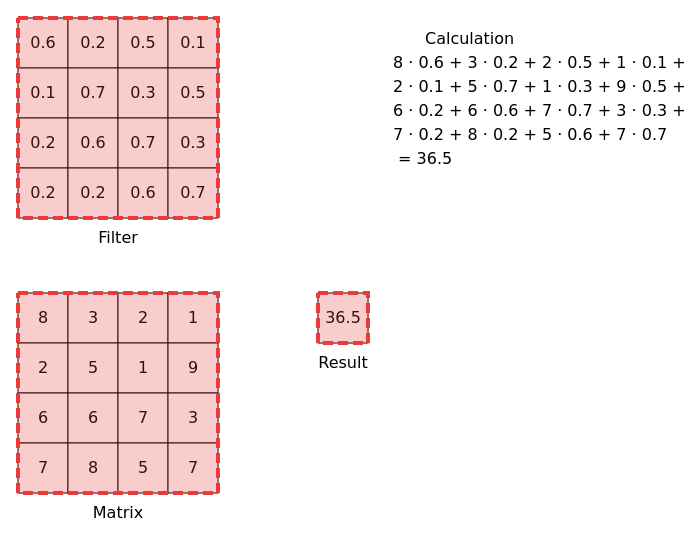

If however we use a kernel size that is smaller than the input size, we can see that the same weights are used for different locations in the input. This means we can do more with less parameters, having fewer parameters without losing the model's expressivity.

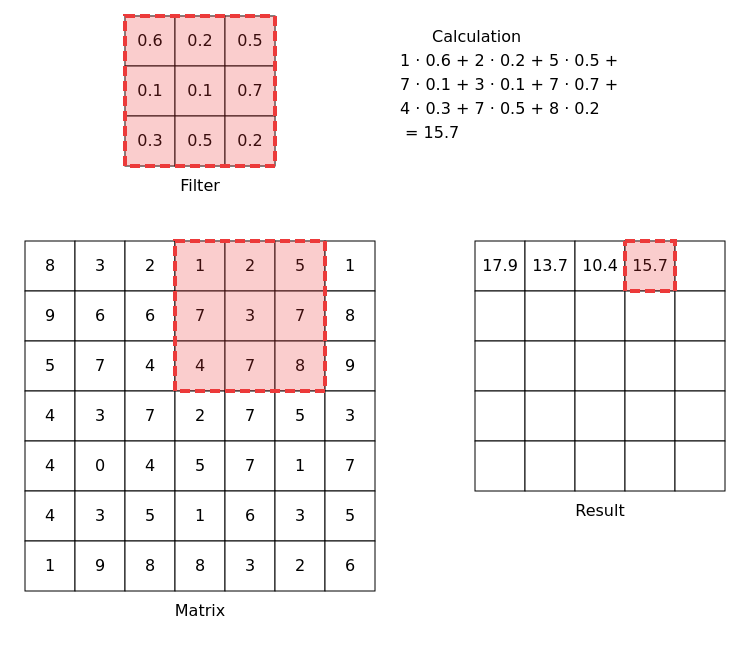

Can you think of reasons why such weight sharing in CNNs may help with overfitting? Does this still hold if we decide to scale up the number of filters and convolutional layers?